In [1]:
import numpy as np
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt

In [2]:
path = 's_queen.jpg'
img = io.imread(path)
print(img.shape)

(700, 698, 3)


In [3]:
def rgb2gray(img):
    r = img[:, :, 0] // 3
    g = img[:, :, 1] // 3
    b = img[:, :, 2] // 3
    return r + g + b

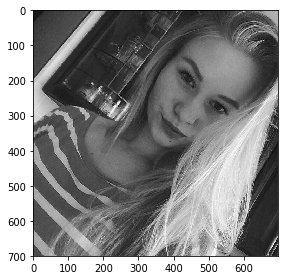

In [4]:
img = rgb2gray(img)
io.imshow(img)

In [5]:
gist = [0] * 256
for i in img:
    for j in i:
        gist[j] += 1
print(gist)

[0, 8, 12, 25, 11, 9, 10, 14, 14, 16, 15, 18, 29, 33, 32, 33, 56, 44, 73, 113, 119, 207, 238, 300, 345, 443, 397, 555, 803, 1055, 1752, 2117, 2025, 2978, 2867, 2691, 4037, 4056, 4226, 5003, 6719, 5689, 5840, 6413, 5113, 5073, 4805, 3449, 3822, 3463, 2798, 3138, 3044, 2764, 2873, 2842, 2790, 3107, 3101, 2932, 3327, 3293, 3126, 3679, 3219, 3386, 3969, 3458, 3783, 4611, 4408, 4407, 5128, 5111, 5173, 5543, 5598, 5057, 5556, 5601, 4767, 5020, 4460, 3917, 3866, 3496, 3030, 3113, 2899, 2726, 2850, 2585, 2528, 2435, 2534, 2341, 2180, 2276, 2136, 2129, 2224, 2098, 2106, 2255, 2132, 2080, 2298, 2121, 2151, 2338, 2269, 2384, 2332, 2435, 2412, 2381, 2490, 2259, 2344, 2291, 2239, 2208, 2148, 2073, 2135, 1976, 2028, 1986, 1875, 1974, 1810, 1751, 1859, 1827, 1859, 1819, 1709, 1895, 1667, 1646, 1739, 1521, 1522, 1715, 1503, 1598, 1764, 1435, 1634, 1590, 1478, 1695, 1459, 1521, 1645, 1482, 1520, 1485, 1519, 1595, 1395, 1480, 1571, 1451, 1540, 1648, 1640, 1709, 1841, 1760, 1868, 1881, 1730, 1680, 1729, 

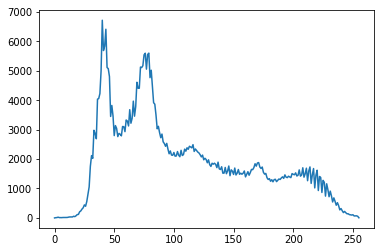

In [6]:
x = [i for i in range(256)]
plt.plot(x, gist)

In [7]:
def gladk(gist, r):
    g = [0] * len(gist)
    for i in range(len(g)):
        left = max(0, i - r)
        right = min(len(g), i + r + 1)
        g[i] = sum(gist[left:right]) / (right - left + 1)
    return g

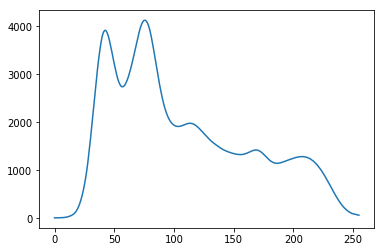

In [8]:
plt.plot(x, gladk(gladk(gist, len(gist) // 40), len(gist) // 40))

In [9]:
def gladk2(gist, r):
    sum_ = 0
    for i in range(-r, r + 1):
        sum_ += 1 / max(i, 1) ** 2
    g = [0] * len(gist)
    for i in range(len(g)):
        left = max(0, i - r)
        right = min(len(g), i + r + 1)
        mid = 0
        for j in range(left, right):
            if j < 0 or j >= len(gist):
                mid += gist[i] / max((i - j), 1) ** 2
            else:
                mid += gist[j] / max((i - j), 1) ** 2
        g[i] = mid / sum_
    return g

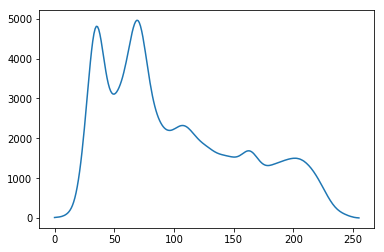

In [10]:
plt.plot(x, gladk2(gladk2(gladk2(gist, len(gist) // 40), len(gist) // 40), len(gist) // 40))

In [11]:
def get_maxes(f, delta):
    maxes = []
    for i in range(1, len(f) - 1):
        if f[i - 1] < f[i] - delta > f[i + 1]:
            maxes.append(i)
    return maxes

In [12]:
def get_mins(f, delta):
    mins = []
    for i in range(1, len(f) - 1):
        if f[i - 1] > f[i] + delta < f[i + 1]:
            mins.append(i)
    return mins

In [13]:
def get_extrs(maxes, mins):
    i = 0
    j = 0
    extrs = []
    while i < len(maxes) and j < len(mins):
        if maxes[i] < mins[j]:
            extrs.append(i)
            i += 1
        else:
            extrs.append(j)
            j += 1
    if i == len(maxes) and j < len(mins):
        extrs.extend(mins[j:])
    elif i < len(maxes):
        extrs.extend(maxes[i:])
    return extrs

In [14]:
g = gladk2(gladk2(gladk2(gist, len(gist) // 40), len(gist) // 40), len(gist) // 40)
print(get_extrs(get_maxes(g, 5), get_mins(g, 5)))

[35, 69]


In [15]:
print(get_maxes(g, 5))

[35, 69]


In [16]:
print(get_mins(g, 0))


[50, 96, 151, 179]


In [17]:
def check_mins(f, mins):
    res = []
    max_ = max(f)
    delta_x = len(f) // 25
    delta_f = max_ / 100
    for min_ in mins:
        correct = False
        for i in range(min_, max(0, min_ - delta_x), -1):
            if g[i] > f[min_] + delta_f:
                correct = True
                break
        if correct:
            correct = False
            for i in range(min_, min(min_ + delta_x, len(f))):
                if g[i] > f[min_] + delta_f:
                    correct = True
                    break
            if correct:
                res.append(min_)
    return res

In [18]:
print(check_mins(g, get_mins(g, 0)))

[50, 96, 179]


In [19]:
real_mins = check_mins(g, get_mins(g, 0))
real_mins.append(255)
prev = 0
mids = []
for i in real_mins:
    mids.append((i + prev) // 2)
    prev = i
print(real_mins)
print(mids)

[50, 96, 179, 255]
[25, 73, 137, 217]


In [20]:
def upper_bound(arr, el):
    left = 0
    right = len(arr) - 1
    while True:
        if right - left == 1:
            if el <= arr[left]:
                return left
            if el <= arr[right]:
                return right
            return right + 1
        if left == right:
            if el <= arr[right]:
                return right
            return right + 1
        mid = (left + right) // 2
        if arr[mid] == el:
            return mid
        if arr[mid] < el:
            left = mid + 1
        else:
            right = mid - 1

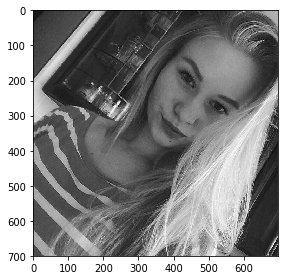

In [21]:
io.imshow(img)

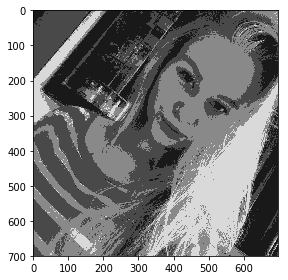

In [22]:
temp = img.copy()
for i in range(len(img)):
    for j in range(len(img[i])):
        temp[i][j] = mids[upper_bound(real_mins, img[i][j])]
io.imshow(temp)